In [1]:
#######################################################################
# This script produces the figure for the two-dimensional synthetic examples in
# van den Boom and Thiery (2024, arXiv:2404.18556).
#######################################################################
%load_ext autoreload
%autoreload 2

import numpy as np
import jax.random as jr
import jax.numpy as jnp
import pylab as plt

import numpy as np
import matplotlib.pyplot as plt

# local imports
import sys
sys.path.append('../')

from util.ellipse import plot_ellipse
from dais.OAIS import OAIS as OAIS

from dais.proba.density import LogDensityGeneral

In [2]:
# initialize random number generator
key = jr.key(0)

In [3]:
## Create a Gaussian target density
dim = 2

# covariance and precision matrix
mu_1 = 1.*np.ones(dim)
Sigma_1 = 0.9*np.ones((dim,dim))
np.fill_diagonal(Sigma_1, 1.)
Sigma_1_inv = np.linalg.inv(Sigma_1)

def log_target_density(z):
    """
    Gaussian log density
    """
    z_centred = z - mu_1
    return -0.5 * jnp.dot(z_centred, Sigma_1_inv @ z_centred)

# create the log density object
logdensity = LogDensityGeneral(
                logdensity=log_target_density,
                dim=dim)

In [20]:
# initial mean/covariance
mu_init = np.zeros(dim)
Gamma_init = np.eye(dim)

# number of smaples and number of iterations
n_samples = 100
n_iter = 10_000

# Effective Sample size threshold
ESS_threshold = 0.5

# initialize the method
oais = OAIS(logtarget=logdensity)

# run the method
key, key_ = jr.split(key)
output_dict = oais.run(
                key = key_,
                mu_init = mu_init,
                cov_init = Gamma_init,
                n_samples = n_samples,
                n_iter = n_iter,
                adam_lr=0.01,
                verbose = False)

Initial Objective: 3215.52466
{'cov_chol_lower': Traced<ShapedArray(float32[2,2])>with<DynamicJaxprTrace(level=1/0)>, 'log_diag': Traced<ShapedArray(float32[2])>with<DynamicJaxprTrace(level=1/0)>, 'mu': Traced<ShapedArray(float32[2])>with<DynamicJaxprTrace(level=1/0)>}


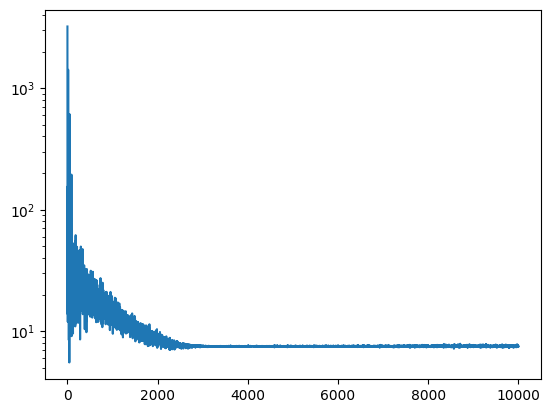

In [21]:
plt.plot(output_dict['objective_trace'])
plt.yscale('log')

In [24]:
mu = output_dict["params"]["mu"]
cov_col = output_dict["params"]["cov_chol"]
cov = np.dot(cov_col, cov_col.T)

print("Estimated mean: ", mu)
print("Estimated covariance: \n", cov)


Estimated mean:  [1.0145766 0.9919447]
Estimated covariance: 
 [[1.0201494 0.9183212]
 [0.9183212 1.0152733]]
